In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [4]:
x = df.iloc[:,0:2]
x.head()

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [5]:
y = df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: placed, dtype: int64

### Perceptron Model

In [7]:
#Perception model
from sklearn.linear_model import Perceptron

In [8]:
per = Perceptron().fit(x,y)

In [9]:
per.intercept_

array([-25.])

In [11]:
per.coef_

array([[ 40.26, -36.  ]])

In [ ]:
#!pip install mlxtend

In [16]:
from mlxtend.plotting import plot_decision_regions

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot:>

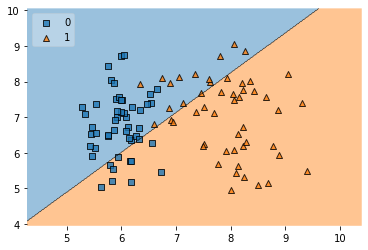

In [19]:
plot_decision_regions(x.values, y.values, clf = per,legend = 2)

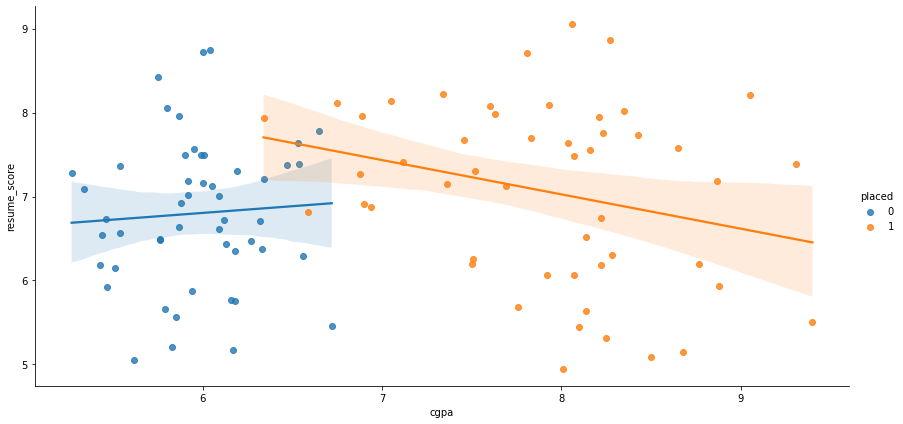

In [24]:
sns.lmplot( data = df,x = 'cgpa', y = 'resume_score',hue = 'placed', height = 6, aspect = 2)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa', ylabel='resume_score'>

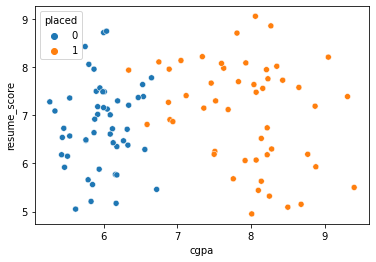

In [25]:
sns.scatterplot(df['cgpa'], df['resume_score'], hue=df['placed'])

### MNIST dataset with Perceptron Model

In [28]:
from sklearn.datasets import load_digits

In [29]:
digits = load_digits()

In [30]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [31]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = digits.data
y = digits.target

In [35]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [36]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 101)

In [38]:
from sklearn.linear_model import Perceptron

In [39]:
perc = Perceptron().fit(x_train,y_train)

In [41]:
y_pred_train = perc.predict(x_train)
y_pred_test = perc.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [43]:
confusion_matrix(y_test,y_pred_test)

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  1,  0,  4,  0,  1,  2,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 28,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 42,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1, 26,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  2,  0,  1,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  1,  3,  0,  0,  0, 29]], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.97      0.81      0.88        42
           2       1.00      0.97      0.98        31
           3       0.90      0.90      0.90        31
           4       0.98      0.95      0.97        44
           5       0.77      1.00      0.87        41
           6       1.00      0.93      0.96        28
           7       0.95      1.00      0.98        40
           8       0.89      0.89      0.89        36
           9       1.00      0.88      0.94        33

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.94       360
weighted avg       0.94      0.93      0.93       360



In [45]:
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Training Accuracy 0.9659011830201809
********************************************************************************
Test Accuracy 0.9333333333333333


### Iris dataset

In [47]:
from sklearn import datasets

In [48]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [49]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train1)
x_train_std = sc.transform(x_train1)
x_test_std = sc.transform(x_test1)

In [53]:
percept = Perceptron()
percept.fit(x_train_std, y_train1)

Perceptron()

In [55]:
y_pred_train1 = percept.predict(x_train_std)
y_pred_test1 = percept.predict(x_test_std)

In [56]:
confusion_matrix(y_test1,y_pred_test1)

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  3, 10]], dtype=int64)

In [57]:
print(classification_report(y_test1,y_pred_test1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      0.89      0.86        18
           2       0.83      0.77      0.80        13

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



In [58]:
print("Training Accuracy", accuracy_score(y_train1, y_pred_train1))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test1, y_pred_test1))

Training Accuracy 0.9333333333333333
********************************************************************************
Test Accuracy 0.8888888888888888
